<a href="https://colab.research.google.com/github/artientin/artientinmachinelearning/blob/main/Tugas1MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
heart = pd.read_csv('/content/heart.csv')

In [100]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [101]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [102]:
heart.drop('ca', axis=1, inplace=True)

In [103]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,2,1


In [104]:
#Memisahkan atribut dan label dengan x adalah atribut dan y adalah label
x = heart[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','thal']]
y = heart['target']

#Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=35)

In [105]:
from sklearn.tree import DecisionTreeClassifier

#Membuat model decision tree
tree_model = DecisionTreeClassifier()

#Melatih model menggunakan data latih dengan fungsi fit
tree_model = tree_model.fit(x_train, y_train)

In [106]:
#Evaluasi model untuk menguji seberapa baik model yang digunakan

from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)
accuracy_score = round(accuracy_score(y_pred, y_test), 2)

print('Accuracy: ', accuracy_score)

Accuracy:  0.87


In [107]:
#Prediksi model dengan tree model yang sudah dibuat dengan variabel [['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','thal']]
print(tree_model.predict([[55, 1, 1, 140, 260, 1, 0, 152, 0, 1.5,2,2]])[0])

1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [108]:
#Melihat visualisasi data
from sklearn.tree import export_graphviz

export_graphviz(tree_model,
                out_file="heart_tree.dot",
                feature_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak', 'slope', 'thal'],
                class_names=['1','0'],
                rounded=True,
                filled=True)

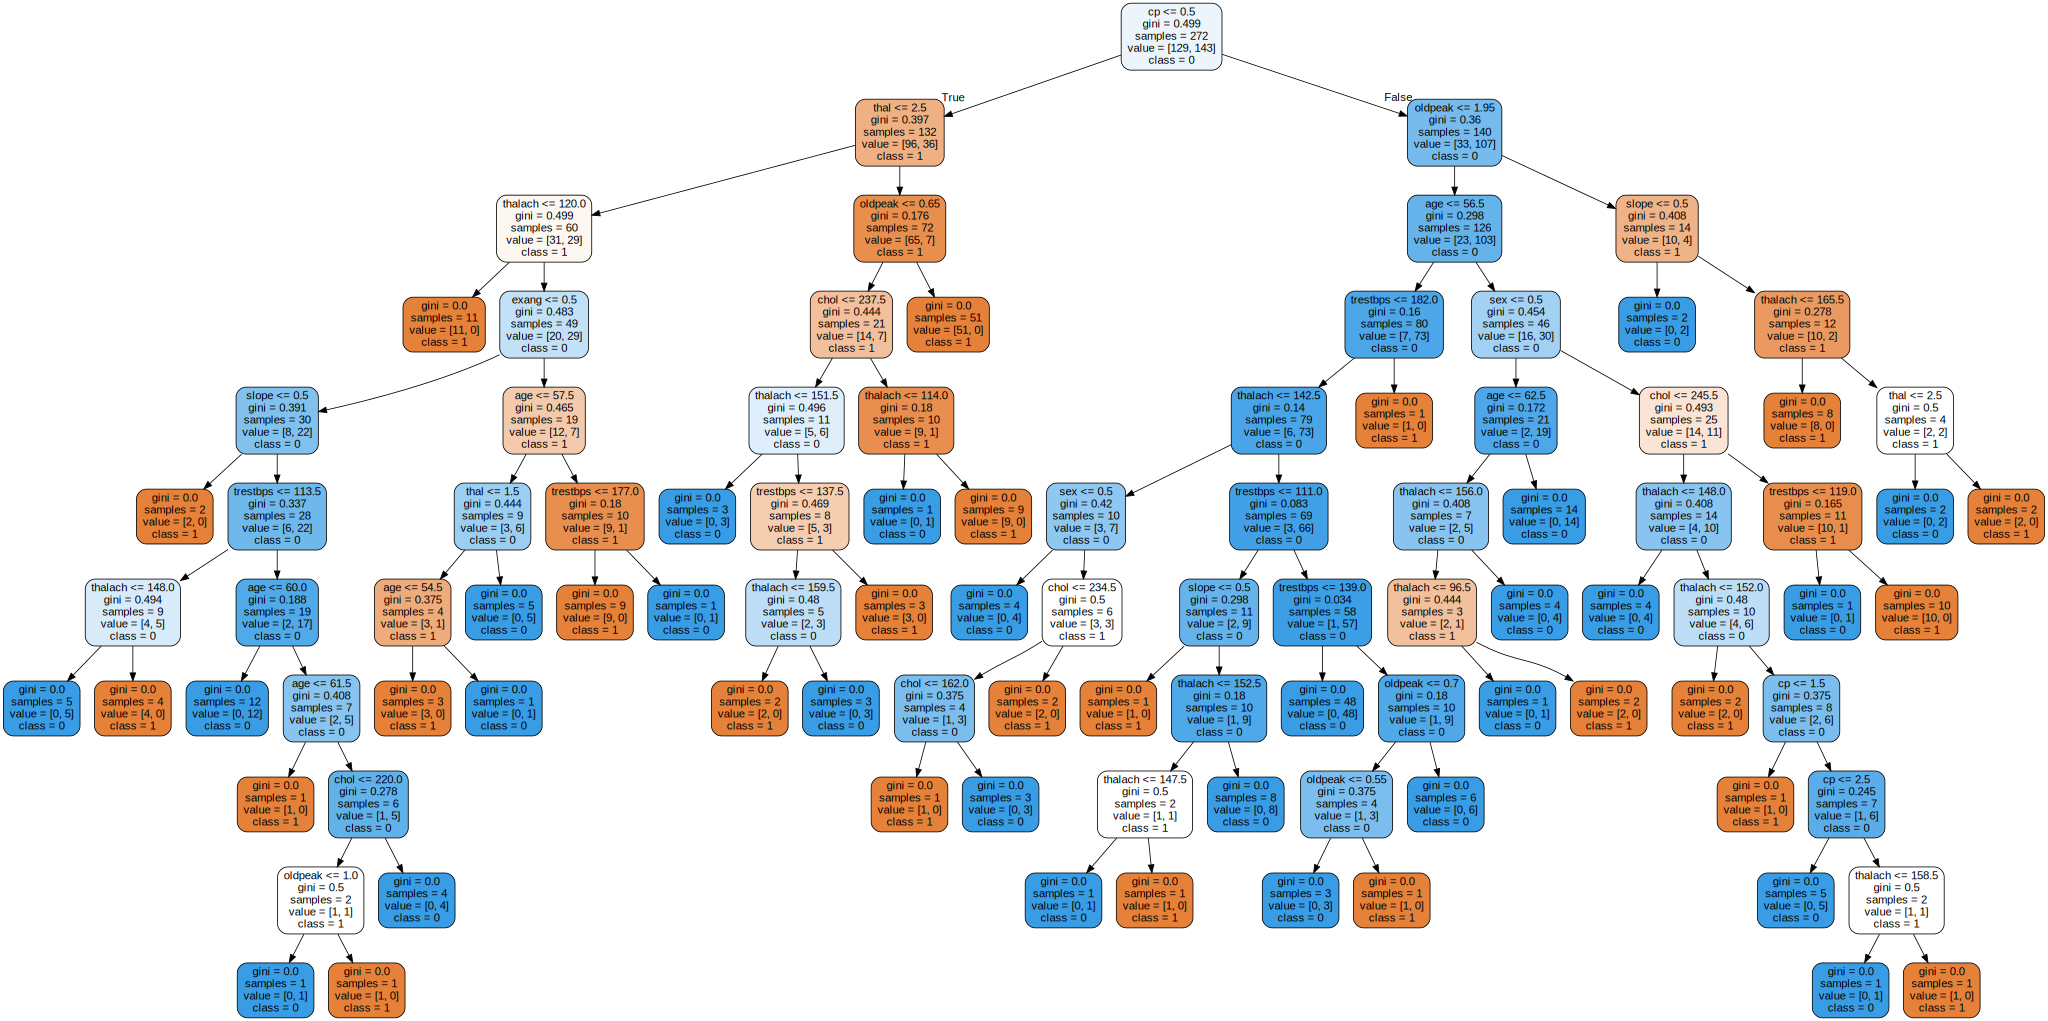

In [109]:
import graphviz

# Baca file .dot dan tampilkan grafiknya
with open("heart_tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)